# Generating Stress/Strain data using Integration

The following mathematical methods I do not fully understand, but I am going to use the equations from the DeepMod paper anyway and code them into python to see the results.

## Developing the code in notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import sympy as sp
import sys

sys.path.append('../')
import data.Generation.VE_DataGen_Functions as vedg

In [ ]:
E = [1, 2, 3, 4]
Eta = [5, 6, 7]

In [ ]:
t = sp.symbols('t', real=True)
x = sp.symbols('x', real=True)

Stress_Decay_Function = E[0]

for i in range(len(Eta)):
    Stress_Decay_Function += E[i+1]*sp.exp(-sp.S(E[i+1])/Eta[i]*(t))
    
Stress_Decay_Function

In [ ]:
Input_Strain = sp.exp(-0.1*t)*sp.sinc(t)
Input_Strain

In [ ]:
Strain_Deriv = Input_Strain.diff(t)
Strain_Deriv

In [ ]:
First_Term = Input_Strain.evalf(subs={t: 0})*Stress_Decay_Function
First_Term

In [ ]:
Int_Result = sp.integrate(Stress_Decay_Function.subs(t, t-x)*Strain_Deriv.subs(t, x), (x, 0, t))
Int_Result

In [ ]:
Stress_Expression = First_Term + Int_Result
Stress_Expression

In [ ]:
time = np.linspace(0.001, 20, 1000)

title = ('')

vedg.Eval_Graph_Strain_Stress(title, time, Input_Strain, Stress_Expression, t)

## After moving functionality to .py, testing functions

In [1]:
import numpy as np
import sympy as sp
import sys

sys.path.append('../')
import data.Generation.VE_DataGen_Functions as vedg

In [2]:
Input_Type = 'Stress'
E = [1, 1, 1]
Eta = [2.5, 1.25] #Remy uses Tau as input. Eta = E*Tau, and all the Es are 1, so Eta = Tau
t = sp.symbols('t', real=True)
Input_Function = sp.sinc(t)
Input_Description = 'Sinc'
Int_Type = 'Numerical'

# Returns a tuple if Int_Type = 'Numerical', where the first element is an analytical expression and the second is a function for integrating numerically a second term.
# Returns a single expression if Int_Type = 'Analytical'. Note, this may not be computationally possible.
Tuple_of_Expressions = vedg.Stress_Strain_Master_Int(Input_Type, E, Eta, Input_Function, Int_Type, t)
print(Tuple_of_Expressions)

(3.0 - 1.0*exp(-0.8*t) - 1.0*exp(-0.4*t), <function Stress_Strain_Master_Int.<locals>.<lambda> at 0x151a522ef0>)


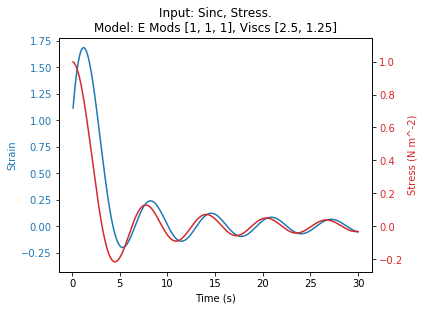

In [3]:
time = np.linspace(0.1, 30, 5000)

title = ('Input: ' + Input_Description + ', ' + Input_Type + 
         '.\nModel: E Mods ' + str(E) + ', Viscs ' + str(Eta))

Strain_Array, Stress_Array = vedg.Eval_Graph_Strain_Stress(title, time, Input_Function, Tuple_of_Expressions, Input_Type, Int_Type, t)